In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv('/content/Zomato data .csv')

In [84]:
#Changing the datatype of 'rate' column

#df['rate'] = df['rate'].str.split('/').str.get(0)
#df['rate'] = df['rate'].astype(float)
# OR

#def handle_rate(value):
  #value = str(value).split('/')
  #value = value[0]
  #return float(value)
#df['rate'] = df['rate'].apply(handle_rate)
#print(df.head())

def handle_rate(value):
  if value == 'New' or value == '-':
    return np.nan
  else:
    value = str(value).split('/')
    value = value[0]
    return float(value)

df['rate'] = df['rate'].apply(handle_rate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [85]:
  #df.info() for getting the summary of dataset

In [86]:
#Type of restaurent
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'type of restaurent')

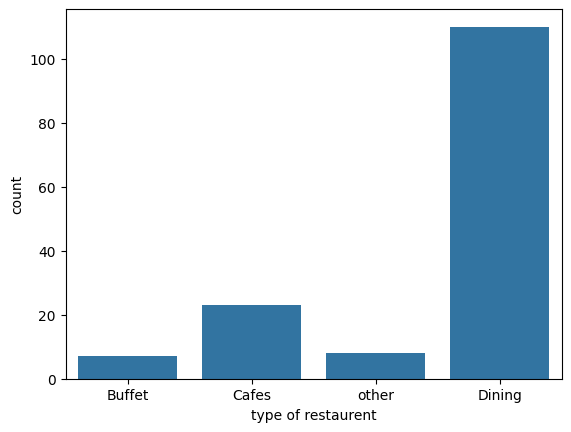

In [87]:
#To find which category customers prefer the most
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("type of restaurent")
#Hence, majority customets fall in the dining category

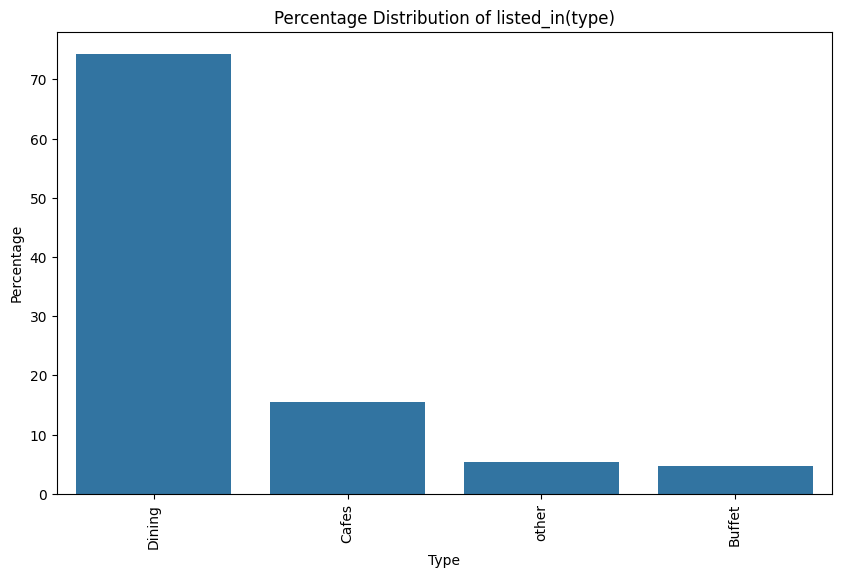

In [88]:
# Calculating the percentage distribution of each category
type_percent = df['listed_in(type)'].value_counts(normalize=True) * 100

# Create a bar plot for percentage distribution
plt.figure(figsize=(10,6))
sns.barplot(x=type_percent.index, y=type_percent.values)
plt.title('Percentage Distribution of listed_in(type)')
plt.xlabel('Type')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()
# Hence dining has the most percentage that is about 74-75

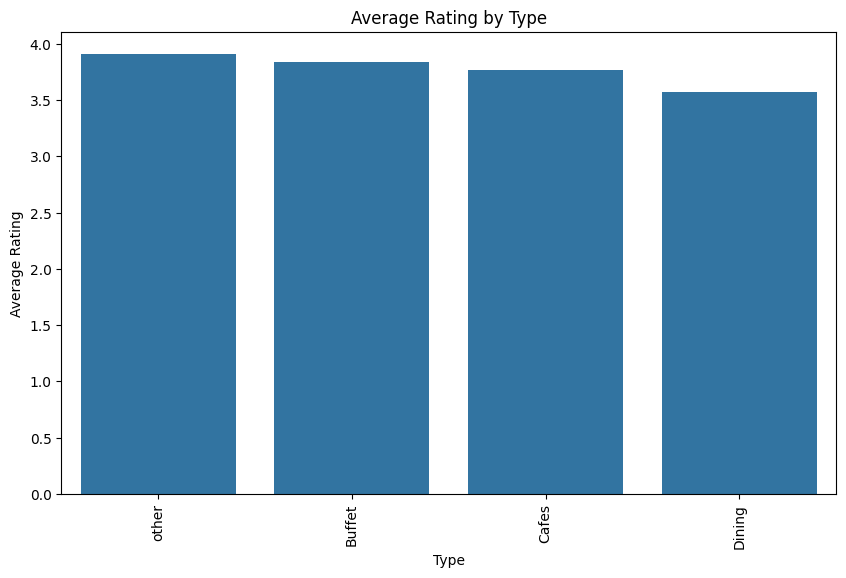

In [89]:
mean_ratings = df.groupby('listed_in(type)')['rate'].mean().sort_values(ascending=False)

# Calculating the average rating per type
plt.figure(figsize=(10,6))
sns.barplot(x=mean_ratings_by_type.index, y=mean_ratings.values)
plt.title('Average Rating by Type')
plt.xlabel('Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

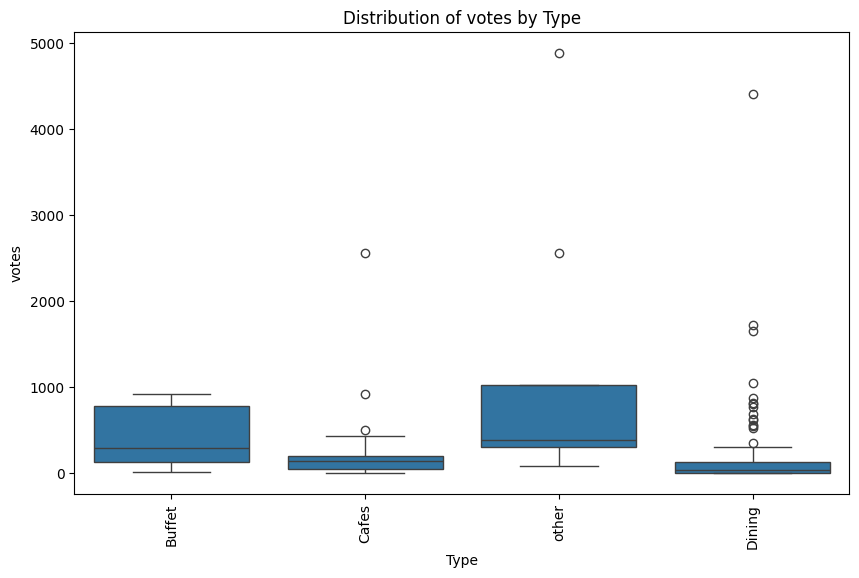

In [90]:
# Boxplot for distribution of votes based on type
plt.figure(figsize=(10,6))
sns.boxplot(x='listed_in(type)', y='votes', data=df)
plt.title('Distribution of votes by Type')
plt.xlabel('Type')
plt.ylabel('votes')
plt.xticks(rotation=90)
plt.show()
# we can see that the dining has the highest number of votes

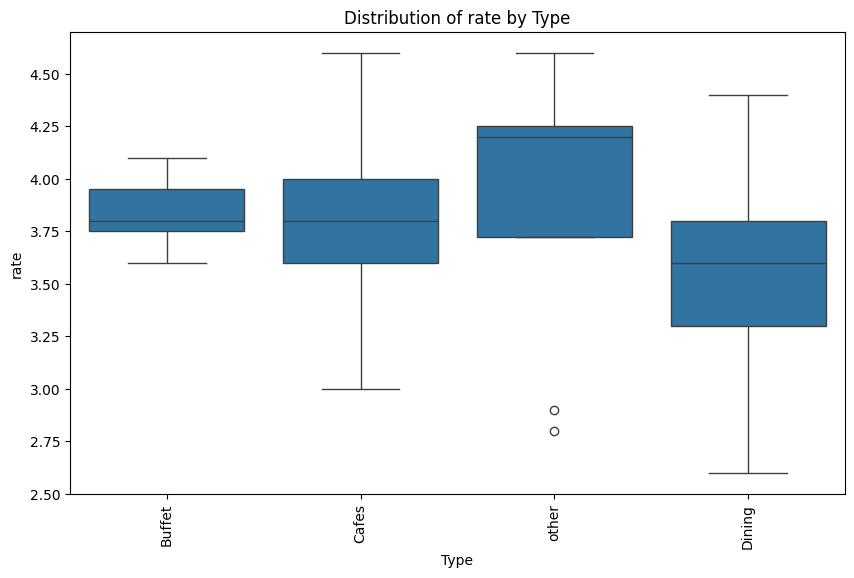

In [91]:
# Boxplot for distribution of rate based on type
plt.figure(figsize=(10,6))
sns.boxplot(x='listed_in(type)', y='rate', data=df)
plt.title('Distribution of rate by Type')
plt.xlabel('Type')
plt.ylabel('rate')
plt.xticks(rotation=90)
plt.show()

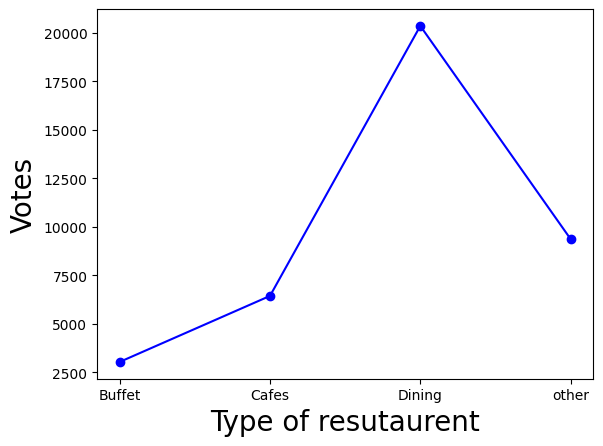

In [92]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes' : grouped_data})
plt.plot(result, c="blue", marker="o")
plt.xlabel("Type of resutaurent", c="black", size=20)
plt.ylabel("Votes", c="black",size=20)
plt.show()
#Hence dining restaurent has received maximum votes

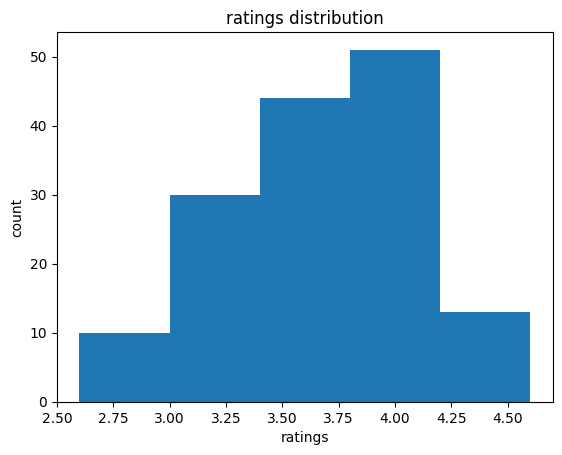

In [93]:
#Histogram for finding the majority rating range
plt.hist(df['rate'],bins =5)
plt.title("ratings distribution")
plt.xlabel("ratings")
plt.ylabel("count")
plt.show()
#Hence the majority rating range is 3.5-4

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

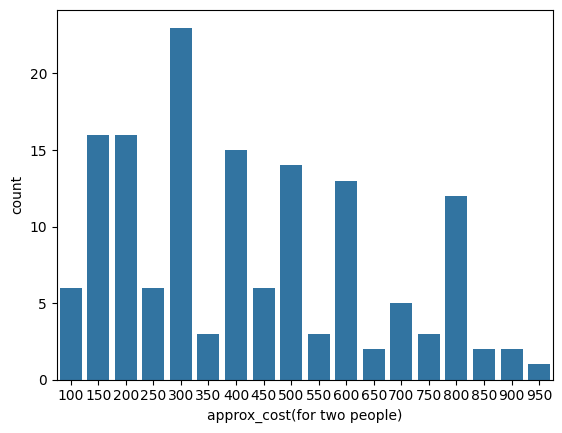

In [94]:
#Spending calculation for calculating the average of the couple orders
couple_data = df['approx_cost(for two people)']
sns.countplot(x=couple_data)
#Hence maximum couples ordered a 300 rupees food

<Axes: xlabel='online_order', ylabel='rate'>

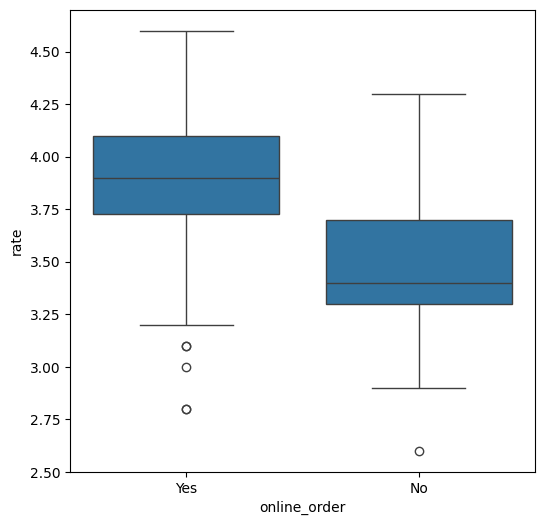

In [95]:
# Finding which category people prefer more based on the ratings
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)
#We can conclude that online orders has better ratings and offline has a lower ratings

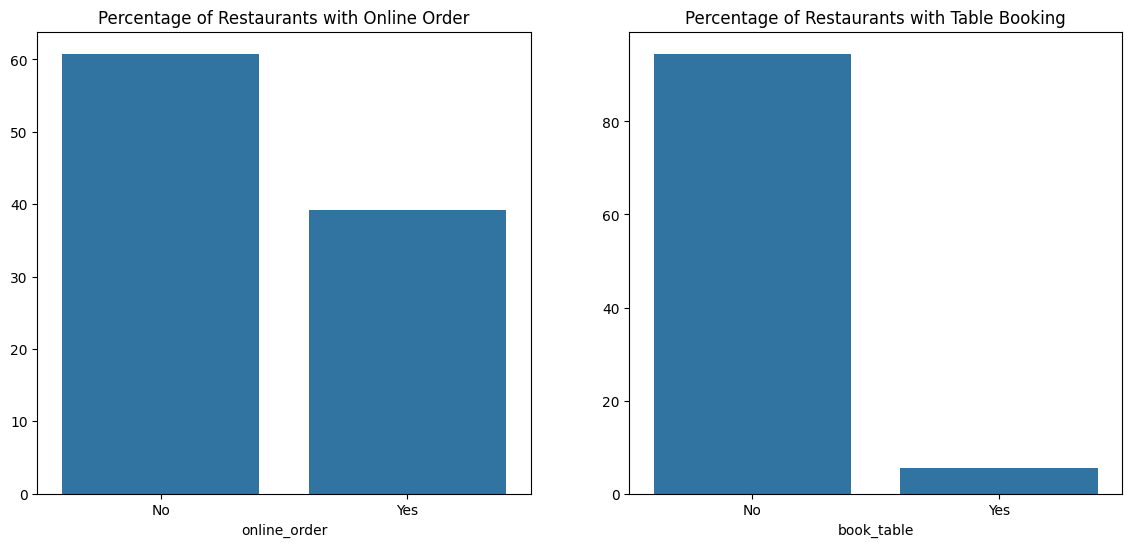

In [96]:
# Online Order availability percentage
online_order_percent = df['online_order'].value_counts(normalize=True) * 100

# Table Booking availability percentage
book_table_percent = df['book_table'].value_counts(normalize=True) * 100

plt.figure(figsize=(14,6))
# creating a subplot
plt.subplot(1, 2, 1)
sns.barplot(x=online_order_percent.index, y=online_order_percent.values)
plt.title('Percentage of Restaurants with Online Order')

plt.subplot(1, 2, 2)
sns.barplot(x=book_table_percent.index, y=book_table_percent.values)
plt.title('Percentage of Restaurants with Table Booking')
plt.show()
#We can conclude that

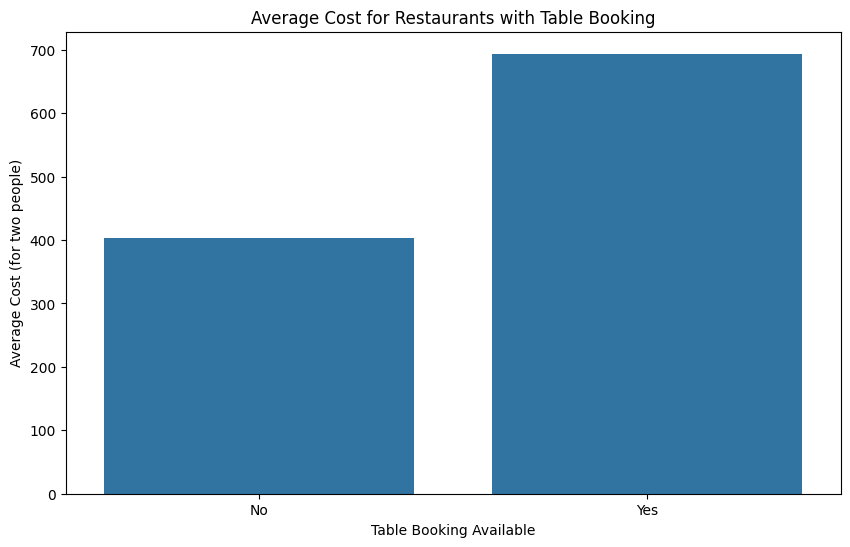

In [97]:
# Calculate average cost based on table booking availability
avg_cost_by_table_booking = df.groupby('book_table')['approx_cost(for two people)'].mean()

# Plot average cost for restaurants with/without table booking
plt.figure(figsize=(10,6))
sns.barplot(x=avg_cost_by_table_booking.index, y=avg_cost_by_table_booking.values)
plt.title('Average Cost for Restaurants with Table Booking')
plt.xlabel('Table Booking Available')
plt.ylabel('Average Cost (for two people)')
plt.show()
# We can see the aveerage cost based on the table booking avalibility

In [98]:
# Top 10 Restaurants by Rating
top_rated_restaurants = df[['name', 'rate']].sort_values(by='rate', ascending=False).head(10)

# Top 10 Restaurants by Votes
top_voted_restaurants = df[['name', 'votes']].sort_values(by='votes', ascending=False).head(10)

print("Top 10 Rated Restaurants:")
print(top_rated_restaurants)

print("\nTop 10 Restaurants by Votes:")
print(top_voted_restaurants)

Top 10 Rated Restaurants:
                      name  rate
44                  Onesta   4.6
7                   Onesta   4.6
38       Empire Restaurant   4.4
86           Meghana Foods   4.4
52  Corner House Ice Cream   4.3
37         Szechuan Dragon   4.2
60           Peppy Peppers   4.2
81           Frozen Bottle   4.2
12        The Coffee Shack   4.2
11            Cafe Shuffle   4.2

Top 10 Restaurants by Votes:
                  name  votes
38   Empire Restaurant   4884
86       Meghana Foods   4401
7               Onesta   2556
44              Onesta   2556
65         Kabab Magic   1720
37     Szechuan Dragon   1647
54        Roving Feast   1047
14     San Churro Cafe    918
2      San Churro Cafe    918
67  Gustoes Beer House    868


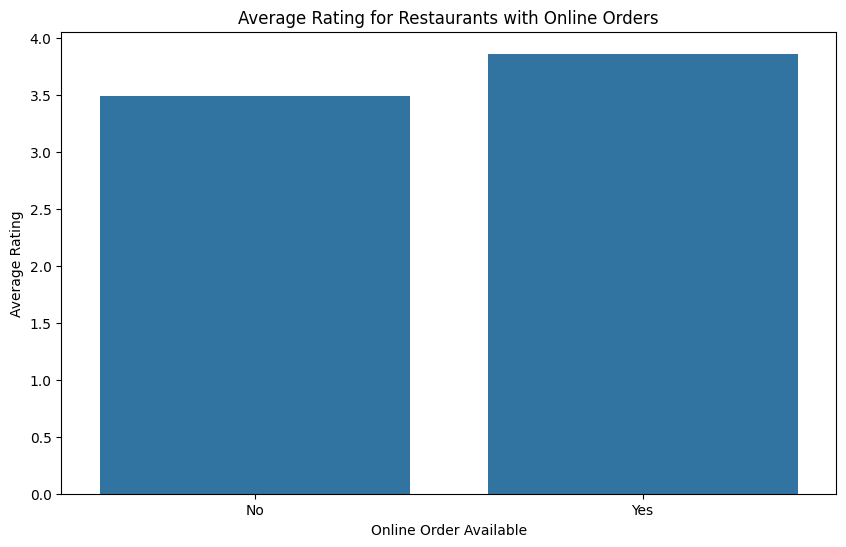

In [99]:
# Calculate average rating based on online order availability
avg_rating_online_order = df.groupby('online_order')['rate'].mean()

# Plot average rating for restaurants with/without online order
plt.figure(figsize=(10,6))
sns.barplot(x=avg_rating_online_order.index, y=avg_rating_online_order.values)
plt.title('Average Rating for Restaurants with Online Orders')
plt.xlabel('Online Order Available')
plt.ylabel('Average Rating')
plt.show()
# We can say that if online orders are there and restaurent has higher rating then then avaliability id comparatively high

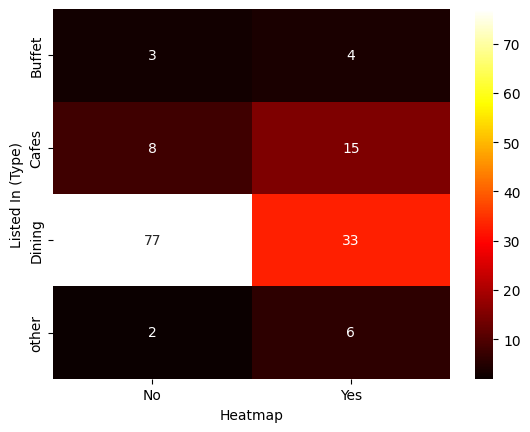

In [100]:
# Heatmap
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="hot", fmt='d')
plt.xlabel("Heatmap")
plt.ylabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()